<div><span style="background-color: #9e4244; padding-top: 80px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 22px; font-weight: bold">EDA ON FRAUDELENT CREDIT CARD TRANSACTIONS ONLINE</span></div>

In [1]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
import re
warnings.filterwarnings("ignore")


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

#format display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#date time
from datetime import datetime

In [2]:
cc_fraud = pd.read_excel('data/sprint_dataset.xlsx')

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 
    20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Data Cleaning and Preprocessing </span></div>

In [3]:
cc_fraud.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,b7e590b6def607cf89d91a9909985b82,2021-02-13,22:39:49,1613255989,misc_net,825.04,1,MedStoreRx,9.265518,123.368859
1,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,d248c10143858b069bb776065646ac48,2021-02-12,23:01:09,1613170869,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292
2,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,a4fb2e02583977d4afc46b09506611f8,2021-02-12,14:45:57,1613141157,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767
3,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,f315ea3abc262b459360f62bd3619c12,2021-02-12,23:08:59,1613171339,shopping_net,919.50,1,Zalora,10.606020,123.930862
4,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,ac3503258c2fff1c16a381d3633b1e0d,2021-02-13,22:56:43,1613257003,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528


In [4]:
cc_fraud['ssn'].value_counts()

4177-6865207-1    2125
8563-6400345-3    2124
5136-0385406-7    2123
7948-2503280-6    2123
6992-9962634-9    2123
2803-3526765-1    2123
3407-5607978-2    2122
6677-1595220-6    2122
3343-1596106-0    2121
1003-1956716-9    2121
7660-9470727-2    2121
9653-0489946-0    2121
6352-6352092-4    2121
9609-0341660-1    2120
7740-5699420-7    2120
4138-0418302-2    2119
3209-5985691-9    2118
7953-7517615-7    2118
2838-1779337-4    2118
4196-0746557-6    2118
7697-9316463-2    2118
8503-2794685-9    2118
4713-4466094-1    2118
8650-2186519-7    2117
7380-5454870-9    2117
6159-4935438-7    2117
4148-6424816-8    2117
4100-8308868-4    2117
0582-6288811-2    2117
1136-8630056-3    2117
7129-3118196-1    2116
3391-8749073-6    2116
3493-3177016-5    2116
0721-7502166-2    2116
9005-9965055-4    2116
2652-6828797-7    2115
2307-1515554-0    2115
5461-2129381-7    2115
9178-5911626-3    2114
6245-7458633-9    2114
8623-3744575-3    2113
2486-5571774-7    2113
3923-1428585-1    2110
2314-173859

In [5]:
cc_fraud.describe()

,cc_num,zip,lat,long,city_pop,acct_num,unix_time,amt,is_fraud,merch_lat,merch_long
count,2.000000e+05,2.000000e+05,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.964612e+17,4.104403e+05,12.836680,122.156171,4.922793e+05,5.537723e+11,1.609189e+09,70.205819,0.008975,12.837277,122.154777
std,1.096331e+18,5.427869e+05,3.009466,1.785025,1.452450e+06,2.873295e+11,1.721540e+07,171.601519,0.094311,3.064447,1.875286
min,6.049060e+10,4.104100e+04,6.116700,118.750000,4.104100e+04,3.843261e+09,1.577837e+09,1.000000,0.000000,5.119448,117.755352
25%,1.800006e+14,1.307590e+05,10.250000,120.941700,1.338930e+05,3.187416e+11,1.594471e+09,8.700000,0.000000,10.213936,120.701837
50%,2.441121e+15,2.494630e+05,14.329400,121.125000,2.831570e+05,5.546115e+11,1.608365e+09,48.820000,0.000000,13.953511,121.535780
75%,4.525827e+15,4.116340e+05,14.683300,123.433300,4.116340e+05,8.450915e+11,1.624455e+09,85.410000,0.000000,15.026644,123.579867
max,4.957609e+18,2.936116e+06,18.200000,126.233300,2.308800e+07,9.973865e+11,1.638835e+09,18039.810000,1.000000,19.199625,127.232784


array([[<AxesSubplot:title={'center':'cc_num'}>,
        <AxesSubplot:title={'center':'zip'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'city_pop'}>,
        <AxesSubplot:title={'center':'dob'}>,
        <AxesSubplot:title={'center':'acct_num'}>,
        <AxesSubplot:title={'center':'trans_date'}>],
       [<AxesSubplot:title={'center':'unix_time'}>,
        <AxesSubplot:title={'center':'amt'}>,
        <AxesSubplot:title={'center':'is_fraud'}>,
        <AxesSubplot:title={'center':'merch_lat'}>],
       [<AxesSubplot:title={'center':'merch_long'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

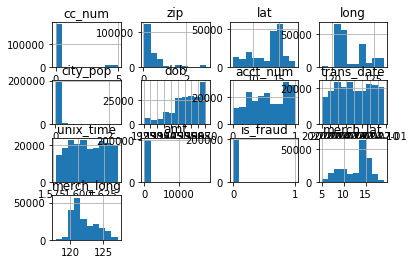

In [6]:
cc_fraud.hist()

### 1. Drop Unnecessary Variables -- output: cc_clean

In [7]:
to_drop = ['cc_num', 'first', 'last', 'street', 'state', 'zip', 'acct_num', 'trans_num', 'unix_time']
cc_clean = cc_fraud.drop(to_drop, axis=1)
cc_clean.head()

,ssn,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:39:49,misc_net,825.04,1,MedStoreRx,9.265518,123.368859
1,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:01:09,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292
2,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,14:45:57,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767
3,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:08:59,shopping_net,919.50,1,Zalora,10.606020,123.930862
4,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:56:43,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528


### 2. Encode Relevant Variables -- output: cc_clean

In [8]:
# pre-processing time
# transaction date
cc_clean['trans_datetime'] = pd.to_datetime(cc_clean['trans_date'])
cc_clean['trans_date'] = cc_clean['trans_datetime'].dt.date
cc_clean['trans_year'] = cc_clean['trans_datetime'].dt.year.astype(str)
cc_clean['trans_month'] = cc_clean['trans_datetime'].dt.month
cc_clean['trans_day'] = cc_clean['trans_datetime'].dt.day
cc_clean['trans_wday'] = pd.Series(cc_clean['trans_datetime']).dt.day_name()

# transaction time
cc_clean['trans_hour'] = cc_clean['trans_time'].astype(str).str[:2].astype(int)

# convert month to string
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
cc_clean['trans_month_'] = cc_clean['trans_month'].map(month_map)

# convert time to part of day
def get_part_of_day(hour):
    """Return the part of day given the hour of day"""
    if (hour > 22) or (hour <= 1):
        return 'late evening'
    elif hour <= 6:
        return 'early morning'
    elif hour <= 11:
        return 'late morning'
    elif hour <= 14:
        return 'midday'
    elif hour <= 18:
        return 'afternoon'
    else:
        return 'early evening'

#apply to dataframe
cc_clean.loc[:, 'part_of_day'] = cc_clean['trans_hour'].apply(get_part_of_day)

# convert transaction type
def get_trans_type(trans):
    if (trans == 'misc_net') or (trans == 'shopping_net') or (trans == 'grocery_net'):
        return 'net'
    else:
        return 'others'

#apply to dataframe    
cc_clean.loc[:, 'trans_type'] = cc_clean['category'].apply(get_trans_type)

#pre-processing age group
cc_clean['dob_datetime'] = pd.to_datetime(cc_clean['dob'])
cc_clean['dob'] = cc_clean['dob_datetime'].dt.date
cc_clean['age'] = (cc_clean['trans_date'] - cc_clean['dob'])/365
cc_clean['age'] = cc_clean['age'].apply(lambda x: x.days)
cc_clean['birth_year'] = cc_clean['dob'].astype(str).str[:4].astype(int)

# convert age group
def get_age_group(year):
    if year < 1946:
        return 'traditionalists'
    elif year < 1965:
        return 'baby boomers'
    elif year < 1977:
        return 'gen x'
    elif year < 1996:
        return 'milennials'
    else:
        return 'gen z'

#apply to dataframe
cc_clean.loc[:, 'age_group'] = cc_clean['birth_year'].apply(get_age_group)

#pre-processing double digit sales
cc_clean['dd_sale_prep'] = cc_clean['trans_month'] - cc_clean['trans_day']

# convert to sale_type
def get_sale_type(date):
    if date == 0:
        return 'double-digit sale'
    else:
        return 'others'

#apply to dataframe
cc_clean.loc[:, 'dd_sale'] = cc_clean['dd_sale_prep'].apply(get_sale_type)

cc_clean.tail(50)

,ssn,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_datetime,trans_year,trans_month,trans_day,trans_wday,trans_hour,trans_month_,part_of_day,trans_type,dob_datetime,age,birth_year,age_group,dd_sale_prep,dd_sale
199950,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2021-08-29,01:56:50,entertainment,21.91,0,Philippine Educational Theater Association,10.218832,123.216024,2021-08-29,2021,8,29,Sunday,1,Aug,late evening,others,1959-12-19,61,1959,baby boomers,-21,others
199951,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-05-02,08:33:22,grocery_pos,74.02,0,All Day Supermarket,9.097269,124.739193,2020-05-02,2020,5,2,Saturday,8,May,late morning,others,1959-12-19,60,1959,baby boomers,3,others
199952,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-11-22,14:34:57,home,101.81,0,Tupperware Brands Philippines,9.868057,123.028731,2020-11-22,2020,11,22,Sunday,14,Nov,midday,others,1959-12-19,60,1959,baby boomers,-11,others
199953,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-05-02,01:16:59,grocery_pos,121.29,0,Rustans Supermarket,9.777285,124.793728,2020-05-02,2020,5,2,Saturday,1,May,late evening,others,1959-12-19,60,1959,baby boomers,3,others
199954,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2021-06-27,17:31:48,home,9.82,0,Uratex Philippines,9.257886,124.346790,2021-06-27,2021,6,27,Sunday,17,Jun,afternoon,others,1959-12-19,61,1959,baby boomers,-21,others
199955,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-03-13,07:12:55,food_dining,30.08,0,The Table Group,9.393347,123.786903,2020-03-13,2020,3,13,Friday,7,Mar,late morning,others,1959-12-19,60,1959,baby boomers,-10,others
199956,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-05-10,02:21:41,gas_transport,71.15,0,Liquigaz Philippines Corp.,10.407646,124.040790,2020-05-10,2020,5,10,Sunday,2,May,early morning,others,1959-12-19,60,1959,baby boomers,-5,others
199957,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2020-05-29,16:44:24,kids_pets,113.63,0,PetExpress,10.278662,124.817611,2020-05-29,2020,5,29,Friday,16,May,afternoon,others,1959-12-19,60,1959,baby boomers,-24,others
199958,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2021-08-26,14:40:10,personal_care,12.53,0,Unilever Philippines Inc.,9.584604,122.935865,2021-08-26,2021,8,26,Thursday,14,Aug,midday,others,1959-12-19,61,1959,baby boomers,-18,others
199959,7490-9288779-9,M,Tagbilaran City,9.6500,123.8500,105051,"Administrator, education",1959-12-19,2021-04-28,14:12:23,health_fitness,18.46,0,The Upper Deck Gym,8.968703,123.034831,2021-04-28,2021,4,28,Wednesday,14,Apr,midday,others,1959-12-19,61,1959,baby boomers,-24,others


### 3. Retain final columns for one-hot enconding dataframe -- output: cc_final

In [9]:
# create a clean copy
cc_final = cc_clean.copy()

#select variables to drop
to_drop2 = ['gender', 'lat', 'long', 'job', 'dob', 'trans_date', 'trans_time', 
            'merch_lat', 'merch_long', 'trans_datetime', 'trans_month',
            'trans_hour', 'dob_datetime', 'birth_year', 'dd_sale_prep']

#drop selected variables
cc_final = cc_final.drop(to_drop2, axis=1)

#check dataset's columns
cc_final.head()

,ssn,city,city_pop,category,amt,is_fraud,merchant,trans_year,trans_day,trans_wday,trans_month_,part_of_day,trans_type,age,age_group,dd_sale
0,8013-2690062-6,Tagbilaran City,105051,misc_net,825.04,1,MedStoreRx,2021,13,Saturday,Feb,early evening,net,60,baby boomers,others
1,8013-2690062-6,Tagbilaran City,105051,grocery_pos,306.55,1,Ever Supermarket,2021,12,Friday,Feb,late evening,others,60,baby boomers,others
2,8013-2690062-6,Tagbilaran City,105051,entertainment,346.48,1,Nine Media Corporation,2021,12,Friday,Feb,midday,others,60,baby boomers,others
3,8013-2690062-6,Tagbilaran City,105051,shopping_net,919.50,1,Zalora,2021,12,Friday,Feb,late evening,net,60,baby boomers,others
4,8013-2690062-6,Tagbilaran City,105051,shopping_net,1131.45,1,Ubuy Co.,2021,13,Saturday,Feb,early evening,net,60,baby boomers,others


### 4. Filter Data According to Study Objective (online transactions only) --output: net_df

In [10]:
net_df = cc_final.copy()
net_df = net_df[net_df['trans_type']=='net']
net_df = net_df.drop('trans_type', axis=1)
net_df.head()

,ssn,city,city_pop,category,amt,is_fraud,merchant,trans_year,trans_day,trans_wday,trans_month_,part_of_day,age,age_group,dd_sale
0,8013-2690062-6,Tagbilaran City,105051,misc_net,825.04,1,MedStoreRx,2021,13,Saturday,Feb,early evening,60,baby boomers,others
3,8013-2690062-6,Tagbilaran City,105051,shopping_net,919.50,1,Zalora,2021,12,Friday,Feb,late evening,60,baby boomers,others
4,8013-2690062-6,Tagbilaran City,105051,shopping_net,1131.45,1,Ubuy Co.,2021,13,Saturday,Feb,early evening,60,baby boomers,others
5,8013-2690062-6,Tagbilaran City,105051,misc_net,996.26,1,Decathlon,2021,13,Saturday,Feb,early evening,60,baby boomers,others
6,8013-2690062-6,Tagbilaran City,105051,shopping_net,923.63,1,Zalora,2021,13,Saturday,Feb,late evening,60,baby boomers,others


In [11]:
#check sprint_df shape
net_df.shape

(20416, 15)

### 5. One-hot encode categorical variables --output: df_final

In [12]:
df_final = net_df.copy()

to_drop3 = []
for col in tqdm(df_final.columns):
    if df_final[col].dtype == 'O':
        dummies = pd.get_dummies(df_final[col], prefix=col, drop_first=False)
        df_final = pd.concat([df_final, dummies], axis=1)
        to_drop3.append(col)
df_final = df_final.drop(to_drop3, axis=1)
df_final.head()

100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 212.00it/s]


,city_pop,amt,is_fraud,trans_day,age,ssn_0040-0999740-6,ssn_0049-5439715-9,ssn_0176-9792969-8,ssn_0196-9555465-8,ssn_0399-8653123-1,ssn_0476-2627741-4,ssn_0582-6288811-2,ssn_0610-4467879-7,ssn_0631-9472883-9,ssn_0694-7580652-9,ssn_0721-7502166-2,ssn_0803-5680575-1,ssn_0898-6832944-9,ssn_1000-2218955-8,ssn_1003-1956716-9,ssn_1058-0839277-3,ssn_1136-8630056-3,ssn_1188-0010575-6,ssn_1191-9267909-3,ssn_1192-2874443-7,ssn_1208-7056939-3,ssn_1262-5750830-1,ssn_1305-4375811-2,ssn_1360-4959401-9,ssn_1467-0904868-9,ssn_1470-9873373-7,ssn_1598-9383551-0,ssn_1640-0224135-6,ssn_1672-2503346-4,ssn_1727-6931368-7,ssn_1970-6921524-0,ssn_1987-8960863-7,ssn_2009-8897467-2,ssn_2016-7610086-4,ssn_2031-9027478-5,ssn_2069-9596551-5,ssn_2187-0222909-9,ssn_2307-1515554-0,ssn_2314-1738599-9,ssn_2361-3878958-0,ssn_2366-3533056-3,ssn_2486-5571774-7,ssn_2520-1044068-5,ssn_2582-9920745-0,ssn_2628-0552018-5,ssn_2652-6828797-7,ssn_2729-0178723-7,ssn_2761-3599237-3,ssn_2803-3526765-1,ssn_2825-9560557-4,ssn_2838-1779337-4,ssn_2849-2205204-7,ssn_2911-5169312-3,ssn_3095-1721904-9,ssn_3160-6252458-3,ssn_3174-7166520-6,ssn_3209-5985691-9,ssn_3259-8875356-0,ssn_3267-5522594-8,ssn_3281-2628491-3,ssn_3343-1596106-0,ssn_3354-2052365-3,ssn_3391-8749073-6,ssn_3400-9633445-0,ssn_3407-5607978-2,ssn_3408-4783365-4,ssn_3493-3177016-5,ssn_3526-9799115-3,ssn_3571-4109141-0,ssn_3607-4288354-3,ssn_3787-4324026-5,ssn_3798-9342350-5,ssn_3849-3344495-6,ssn_3923-1428585-1,ssn_3979-3206543-1,ssn_4100-8308868-4,ssn_4138-0418302-2,ssn_4148-6424816-8,ssn_4177-6865207-1,ssn_4196-0746557-6,ssn_4242-0656197-5,ssn_4355-7294964-6,ssn_4468-6906633-4,ssn_4711-9398634-1,ssn_4713-4466094-1,ssn_4725-8297995-5,ssn_4725-8761827-5,ssn_4777-8349443-8,ssn_4800-8477612-3,ssn_4955-5319958-8,ssn_4960-3393979-8,ssn_4990-6951890-3,ssn_5116-9104506-1,ssn_5136-0385406-7,ssn_5158-9450907-8,ssn_5203-5867784-5,ssn_5210-0188932-6,ssn_5219-6721463-4,ssn_5243-4394117-7,ssn_5320-4500853-2,ssn_5373-4331007-5,ssn_5427-8063969-1,ssn_5461-2129381-7,ssn_5513-6183741-8,ssn_5551-8613437-9,ssn_5654-5060347-1,ssn_5690-0822335-8,ssn_5694-8499655-3,ssn_5699-4934928-2,ssn_5716-8971925-5,ssn_5842-7847639-9,ssn_5849-8790823-8,ssn_5956-5571294-9,ssn_6051-4702308-3,ssn_6159-4935438-7,ssn_6245-7458633-9,ssn_6334-6064039-5,ssn_6350-8500516-3,ssn_6352-6352092-4,ssn_6375-3746486-0,ssn_6480-3328127-2,ssn_6563-7563353-9,ssn_6570-1007391-6,ssn_6597-3431064-7,ssn_6673-2526228-8,ssn_6677-1595220-6,ssn_6711-8673677-8,ssn_6775-2752563-1,ssn_6791-2918161-4,ssn_6864-3462745-8,ssn_6936-8957937-1,ssn_6937-5537233-7,ssn_6992-9962634-9,ssn_7113-8426781-0,ssn_7129-3118196-1,ssn_7149-7395918-4,ssn_7297-2209484-6,ssn_7315-1379101-6,ssn_7380-5454870-9,ssn_7422-3514655-3,ssn_7490-3296688-3,ssn_7490-9288779-9,ssn_7561-1080731-6,ssn_7660-9470727-2,ssn_7696-3871535-6,ssn_7697-9316463-2,ssn_7740-5699420-7,ssn_7898-0966594-2,ssn_7948-2503280-6,ssn_7953-7517615-7,ssn_8013-2690062-6,ssn_8034-7218351-6,ssn_8095-6382161-6,ssn_8112-3057063-6,ssn_8197-6047393-3,ssn_8314-2736211-7,ssn_8345-9931350-1,ssn_8384-4408758-5,ssn_8503-2794685-9,ssn_8563-6400345-3,ssn_8623-3744575-3,ssn_8650-2186519-7,ssn_8699-3368794-9,ssn_8720-8002679-7,ssn_8728-3802836-3,ssn_8743-6879550-3,ssn_8833-2624297-0,ssn_8943-7627171-8,ssn_9005-9965055-4,ssn_9021-0204746-1,ssn_9061-5839258-8,ssn_9067-0208175-9,ssn_9075-1045109-9,ssn_9169-9909139-5,ssn_9178-5911626-3,ssn_9240-2305879-8,ssn_9265-6111632-8,ssn_9269-1853717-0,ssn_9294-5286349-5,ssn_9350-2504121-7,ssn_9597-0441700-7,ssn_9609-0341660-1,ssn_9630-4745203-7,ssn_9638-5032676-4,ssn_9653-0489946-0,ssn_9787-5932507-0,ssn_9887-1838515-3,ssn_9928-0764698-8,ssn_9971-3574312-4,city_Angeles City,city_Antipolo,city_Bacolod,city_Bacoor,city_Baguio City,city_Balanga,city_Batangas,city_Binan,city_Borongan,city_Butuan,city_Cabanatuan City,city_Cabuyao,city_Cadiz,city_Calapan,city_Caloocan City,city_Cebu City,city_City of Calamba,city_City of Isabela,city_City of Paranaque,city_Cotabato,city_Dagupan City,city_Dasmarinas,city_Davao,city_Digos,city_Di

In [13]:
df_final.shape

(20416, 352)

In [ ]:
# #export to file
# df_final.to_csv('data/cc_df3.csv', index=None)

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Exploratory Data Analysis </span></div>

### dataset directory

Initial Data Prep
- **cc_fraud**: original assigned dataset
- **cc_clean**: includes recoded variables, prior to dropping columns
- **cc_final**: shows all types of transactions, only has relevant columns, includes recoded columns
- **net_df**: only net transactions, used for model dataset


Model Dataset
- **df_final**: one-hot encoded


EDA Datasets
- **eda_all_df**: shows all transactions
- **eda_net_df**: shows only net transations
- **cc_fraud_eda**: with fraud class, shows all transactions
- **fraud_df**: with fraud class, fraud transactions only

In [14]:
eda_all_df = cc_clean.copy()

to_drop4 = ['dob', 'trans_date', 'trans_time', 'trans_datetime', 'dob_datetime', 'dd_sale_prep', 'dd_sale_prep']
eda_all_df = eda_all_df.drop(to_drop4, axis=1)

fraud_map = {0: 'valid', 1: 'fraud'}
eda_all_df['class'] = eda_all_df['is_fraud'].map(fraud_map)

eda_all_df.head()

,ssn,gender,city,lat,long,city_pop,job,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_year,trans_month,trans_day,trans_wday,trans_hour,trans_month_,part_of_day,trans_type,age,birth_year,age_group,dd_sale,class
0,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,misc_net,825.04,1,MedStoreRx,9.265518,123.368859,2021,2,13,Saturday,22,Feb,early evening,net,60,1960,baby boomers,others,fraud
1,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292,2021,2,12,Friday,23,Feb,late evening,others,60,1960,baby boomers,others,fraud
2,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767,2021,2,12,Friday,14,Feb,midday,others,60,1960,baby boomers,others,fraud
3,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,shopping_net,919.50,1,Zalora,10.606020,123.930862,2021,2,12,Friday,23,Feb,late evening,net,60,1960,baby boomers,others,fraud
4,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528,2021,2,13,Saturday,22,Feb,early evening,net,60,1960,baby boomers,others,fraud


In [15]:
#save a copy
eda_all_df.to_csv('data/eda_all_df.csv', index=None)

In [16]:
eda_net_df = eda_all_df.copy()
eda_net_df = eda_net_df[eda_net_df['trans_type']=='net']
eda_net_df.shape

(20416, 26)

In [17]:
#save a copy
eda_net_df.to_csv('data/eda_net_df.csv', index=None)

In [18]:
cc_final.shape

(200000, 16)

In [19]:
eda_all_df['class'].unique()

array(['fraud', 'valid'], dtype=object)

In [20]:
cc_fraud_eda = eda_all_df.copy()

In [21]:
fraud_df = cc_fraud_eda.copy()
fraud_df = fraud_df[fraud_df['class']=='fraud']
fraud_df.head()

,ssn,gender,city,lat,long,city_pop,job,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_year,trans_month,trans_day,trans_wday,trans_hour,trans_month_,part_of_day,trans_type,age,birth_year,age_group,dd_sale,class
0,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,misc_net,825.04,1,MedStoreRx,9.265518,123.368859,2021,2,13,Saturday,22,Feb,early evening,net,60,1960,baby boomers,others,fraud
1,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292,2021,2,12,Friday,23,Feb,late evening,others,60,1960,baby boomers,others,fraud
2,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767,2021,2,12,Friday,14,Feb,midday,others,60,1960,baby boomers,others,fraud
3,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,shopping_net,919.50,1,Zalora,10.606020,123.930862,2021,2,12,Friday,23,Feb,late evening,net,60,1960,baby boomers,others,fraud
4,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528,2021,2,13,Saturday,22,Feb,early evening,net,60,1960,baby boomers,others,fraud


In [22]:
offline_df = eda_all_df.copy()
offline_df = offline_df[offline_df['trans_type']=='others']
offline_df.shape

(179584, 26)

In [24]:
sprint_df = net_df.copy()

In [25]:
print("Number of Individuals in Total Database: " + str(cc_final['ssn'].nunique()))
print("Number of Individuals in Net Database: " + str(sprint_df['ssn'].nunique()))
print("Number of Individuals in Net + Fraudulent Database: " + str(fraud_df['ssn'].nunique()))

Number of Individuals in Total Database: 189
Number of Individuals in Net Database: 189
Number of Individuals in Net + Fraudulent Database: 187


In [26]:
print("Number of Transactions in Total Database: " + str(cc_final['ssn'].count()))
print("Number of Transactions in Net Database: " + str(sprint_df['ssn'].count()))
print("Number of Transactions in Net + Fraudulent Database: " + str(fraud_df['ssn'].count()))

Number of Transactions in Total Database: 200000
Number of Transactions in Net Database: 20416
Number of Transactions in Net + Fraudulent Database: 1795


### Age

Age Groups among Online Transations


<AxesSubplot:>

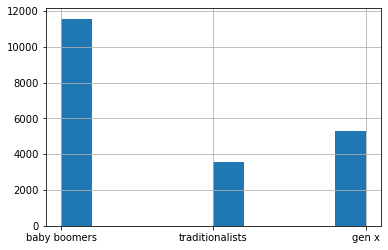

In [27]:
print('Age Groups among Online Transations')
sprint_df['age_group'].hist()

Age among Online Transations


<AxesSubplot:>

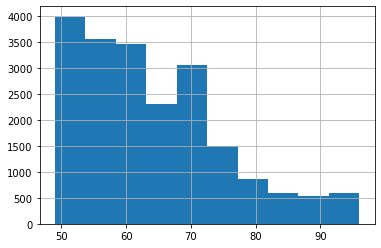

In [28]:
print('Age among Online Transations')
sprint_df['age'].hist()

Age among Fraudulent Transations


<AxesSubplot:>

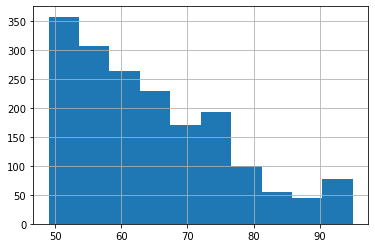

In [29]:
print('Age among Fraudulent Transations')
fraud_df['age'].hist()

birth year among online transactions


<AxesSubplot:>

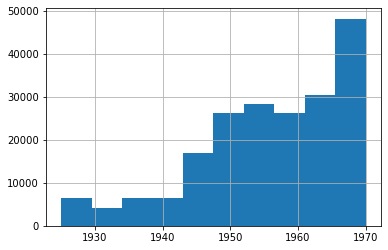

In [30]:
print('birth year among online transactions')
cc_clean['birth_year'].hist()

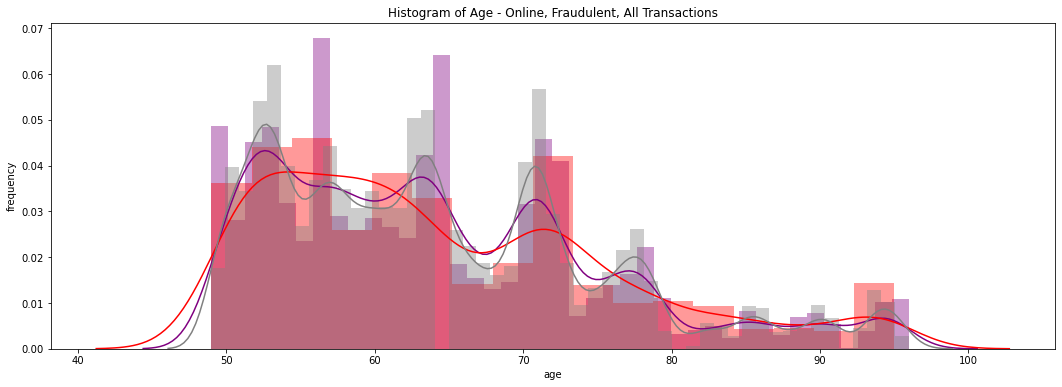

(20416, 15)

(1795, 26)

(200000, 16)

In [31]:
plt.figure(figsize=(18, 6))
sns.distplot(sprint_df['age'], color='purple') # online transactions only
sns.distplot(fraud_df['age'], color='red') # fraudulent transactions among online transactions
sns.distplot(cc_final['age'], color='grey') #all transactions
    
plt.title('Histogram of Age - Online, Fraudulent, All Transactions')
plt.ylabel('frequency')
plt.xlabel('age')
plt.show()

display(sprint_df.shape, fraud_df.shape, cc_final.shape)

### Transaction Time EDA

<AxesSubplot:>

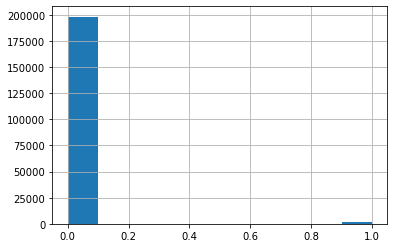

In [32]:
cc_fraud['is_fraud'].hist()

In [33]:
plt.figure(figsize=(18, 6))
sns.distplot(sprint_df['trans_month'], color='purple') # online transactions only
sns.distplot(fraud_df['trans_month'], color='red') # fraudulent transactions among online transactions
sns.distplot(cc_final['trans_month'], color='grey') #all transactions
    
plt.title('Histogram of trans_month - Online, Fraudulent, All Transactions')
plt.ylabel('frequency')
plt.xlabel('trans_month')
plt.show()

display(sprint_df.shape, fraud_df.shape, cc_final.shape)

KeyError: 'trans_month'

<Figure size 1296x432 with 0 Axes>

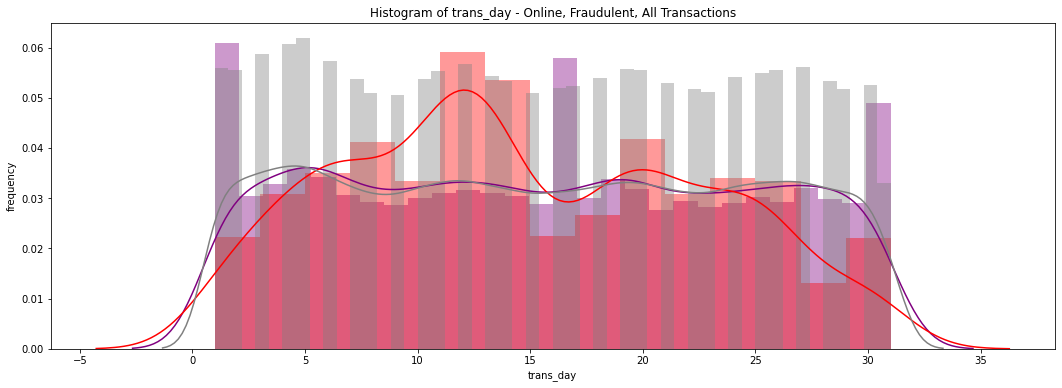

(20416, 15)

(1795, 26)

(200000, 16)

In [45]:
plt.figure(figsize=(18, 6))
sns.distplot(sprint_df['trans_day'], color='purple') # online transactions only
sns.distplot(fraud_df['trans_day'], color='red') # fraudulent transactions among online transactions
sns.distplot(cc_final['trans_day'], color='grey') #all transactions
    
plt.title('Histogram of trans_day - Online, Fraudulent, All Transactions')
plt.ylabel('frequency')
plt.xlabel('trans_day')
plt.show()

display(sprint_df.shape, fraud_df.shape, cc_final.shape)

In [46]:
plt.figure(figsize=(18, 6))
sns.distplot(sprint_df['trans_hour'], color='purple') # online transactions only
sns.distplot(fraud_df['trans_hour'], color='red') # fraudulent transactions among online transactions
sns.distplot(cc_final['trans_hour'], color='grey') #all transactions
    
plt.title('Histogram of trans_hour - Online, Fraudulent, All Transactions')
plt.ylabel('frequency')
plt.xlabel('trans_hour')
plt.show()

display(sprint_df.shape, fraud_df.shape, cc_final.shape)

KeyError: 'trans_hour'

<Figure size 1296x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(18, 6))
sns.distplot(sprint_df['trans_hour'], color='purple') # online transactions only
sns.distplot(fraud_df['trans_hour'], color='red') # fraudulent transactions among online transactions
sns.distplot(cc_final['trans_hour'], color='grey') #all transactions
    
plt.title('Histogram of trans_hour - Online, Fraudulent, All Transactions')
plt.ylabel('frequency')
plt.xlabel('trans_hour')
plt.show()

display(sprint_df.shape, fraud_df.shape, cc_final.shape)

In [47]:
plt.figure(figsize=(18, 6))
plt.bar(net_df['trans_hour'], color='purple') # online transactions only
plt.bar(fraud_df['trans_hour'], color='red') # fraudulent transactions among online transactions
plt.bar(eda_all_df['trans_hour'], color='grey') #all transactions
    
plt.title('Histogram of trans_hour - Online, Fraudulent, All Transactions')
plt.ylabel('frequency')
plt.xlabel('trans_hour')
plt.show()

display(sprint_df.shape, fraud_df.shape, cc_final.shape)

KeyError: 'trans_hour'

<Figure size 1296x432 with 0 Axes>

### Amount

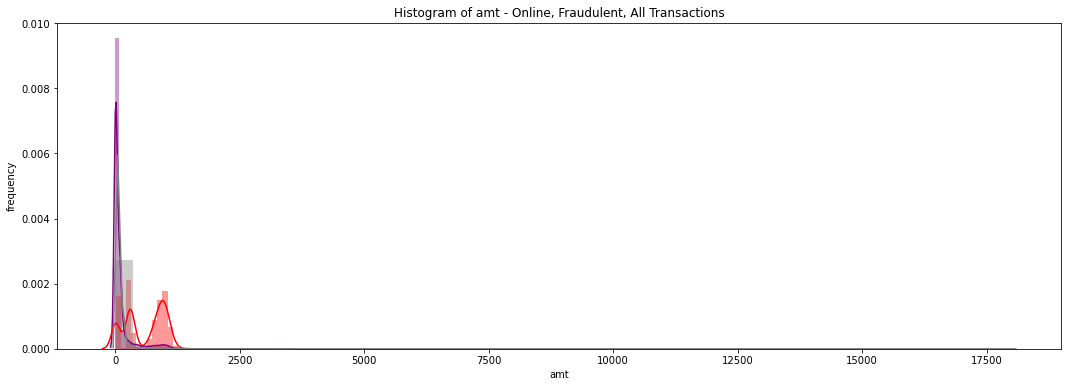

(20416, 15)

(1795, 26)

(200000, 16)

In [48]:
plt.figure(figsize=(18, 6))
sns.distplot(sprint_df['amt'], color='purple') # online transactions only
sns.distplot(fraud_df['amt'], color='red') # fraudulent transactions among online transactions
sns.distplot(cc_final['amt'], color='grey') #all transactions
    
plt.title('Histogram of amt - Online, Fraudulent, All Transactions')
plt.ylabel('frequency')
plt.xlabel('amt')
plt.show()

display(sprint_df.shape, fraud_df.shape, cc_final.shape)

#boxplot for fraud & non-fraud, violin plot

In [ ]:
# import plotly.express as px

# all_amt = pd.DataFrame(eda_all_df['amt'])
# all_amt['type'] = 'all'
# all_amt.reset_index()

# net_amt = pd.DataFrame(net_df['amt'])
# net_amt['type'] = 'net'
# net_amt.reset_index()

# fraud_net_amt = eda_net_df[eda_net_df['class']=='fraud']
# fraud_net_amt = pd.DataFrame(fraud_net_amt['amt'])
# fraud_net_amt['type'] = 'fraud on net'
# fraud_net_amt.reset_index()

# for_plot = all_amt.append(net_amt)
# for_plot = for_plot.append(fraud_net_amt)
    
# df = for_plot
# fig = px.box(df, x="type", y="amt", notched=True)
# fig.show()

In [ ]:
# for_plot

### Valid vs Fraud 

valid    198205
fraud      1795
Name: class, dtype: int64

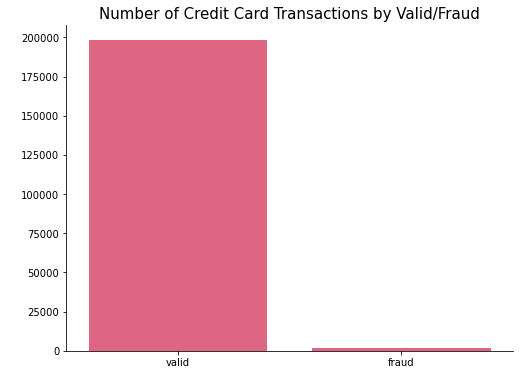

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x=eda_all_df['class'],
              order=eda_all_df['class'].value_counts().index,
              color="#F25278")
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Number of Credit Card Transactions by Valid/Fraud', size=15, y=1)
display(eda_all_df['class'].value_counts())
plt.show()

### Net vs Others

others    179584
net        20416
Name: trans_type, dtype: int64

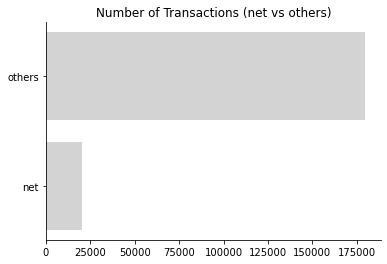

In [50]:
#Number of transactions (net vs others)
net = pd.DataFrame({'trans_count': eda_all_df['trans_type'].value_counts().sort_values()})

colors_h = ['lightgray']

fig, ax = plt.subplots()
ax.barh(net.index, net.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
plt.title('Number of Transactions (net vs others)')
display(eda_all_df['trans_type'].value_counts())
plt.show()

NameError: name 'axes' is not defined

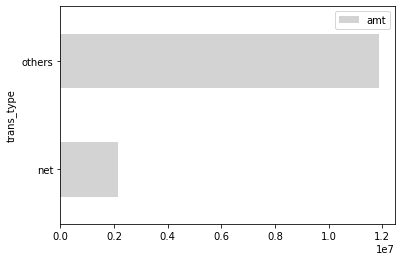

In [51]:
#Total Amount of transactions (net vs others)
net_2 = pd.DataFrame(eda_all_df.groupby('trans_type')['amt'].sum())

colors_h = ['lightgray']

net_2.plot.barh(color=colors_h)
# axes.spines['left'].set_visible(False)
plt.setp(axes.spines.values(), visible=False)


plt.title('Amount of Transactions (net vs others)')
display(eda_all_df.groupby('trans_type')['amt'].sum())
plt.show()

,ave_amt
net,105.527461
others,66.190280


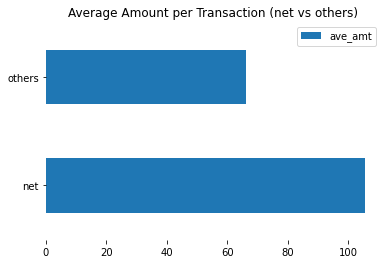

In [52]:
#Average Amount per Transaction (net vs others)
net_3 = net.join(net_2).sort_values(['trans_count'])
net_3['ave_amt'] = (net_3['amt'])/ (net_3['trans_count'])
net_3 = net_3[['ave_amt']]
              
net_3.plot.barh()
axes = plt.gca() 
axes.spines['top'].set_visible(False)
plt.setp(axes.spines.values(), visible=False)
plt.title('Average Amount per Transaction (net vs others)')
display(net_3)
plt.show()

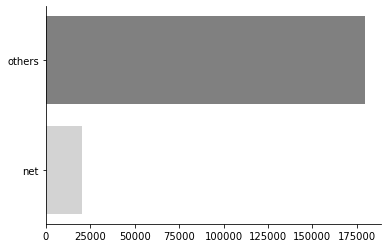

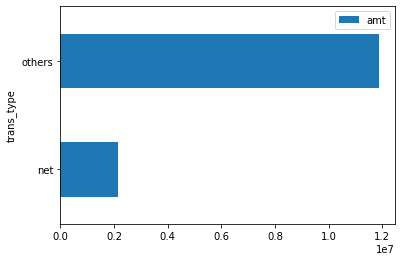

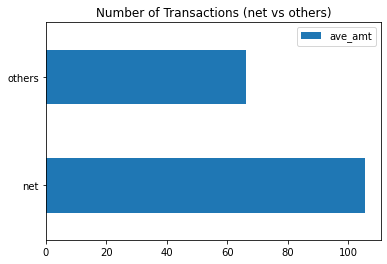

others    179584
net        20416
Name: trans_type, dtype: int64

trans_type
net        2154448.65
others    11886715.23
Name: amt, dtype: float64

In [53]:
#Number of transactions (net vs others)
count = pd.DataFrame({'trans_count': eda_all_df['trans_type'].value_counts().sort_values()})
amt = pd.DataFrame(eda_all_df.groupby('trans_type')['amt'].sum())

ave_amt = count.join(amt).sort_values(['trans_count'])
ave_amt['ave_amt'] = (amt['amt'])/ (count['trans_count'])
ave_amt = ave_amt[['ave_amt']]

colors_h = ['lightgray', 'gray', 'darkblue']

fig, ax = plt.subplots()

ax.barh(count.index, count.trans_count, color=colors_h)
amt.plot.barh()
ave_amt.plot.barh()

ax.barh(net.index, net.trans_count, color=colors_h)

for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
plt.title('Number of Transactions (net vs others)')

plt.show()


display(eda_all_df['trans_type'].value_counts())
display(eda_all_df.groupby('trans_type')['amt'].sum())

In [54]:
type_by_merchant = cc_fraud_eda.groupby('trans_type')

trans_type
net       0.037079
others    0.005780
dtype: float64

,is_fraud,is_valid
trans_type,,
net,757,19659
others,1038,178546


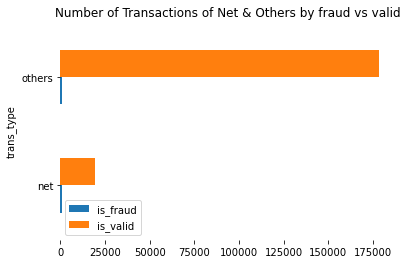

In [55]:
net_4 = pd.DataFrame(eda_all_df.groupby('trans_type')['is_fraud'].sum())
net_4 = net_4.join(net).sort_values(['trans_count'])
net_4['is_valid'] = net_4['trans_count'] - net_4['is_fraud']
net_4_per = net_4['is_fraud'] / net_4['trans_count']
net_4 = net_4[['is_fraud', 'is_valid']]


net_4.plot.barh()
axes = plt.gca() 
axes.spines['top'].set_visible(False)
plt.setp(axes.spines.values(), visible=False)
display(net_4_per)
display(net_4)
plt.title('Number of Transactions of Net & Others by fraud vs valid')
plt.show()

class,fraud,valid
net,680216.54,1474232.11
others,394032.16,11492683.07


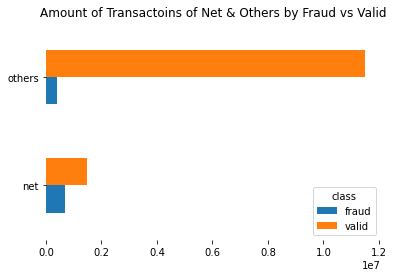

In [56]:
net_4a = pd.DataFrame(eda_net_df.groupby('class')['amt'].sum())
off1 = pd.DataFrame(offline_df.groupby('class')['amt'].sum())
net_4a.rename(columns = {'amt':'net'}, inplace=True)
off1.rename(columns = {'amt':'others'}, inplace=True)
net_4a = net_4a.join(off1).T

net_4a.plot.barh()

axes = plt.gca() 
axes.spines['top'].set_visible(False)
plt.setp(axes.spines.values(), visible=False)
display(net_4a)
plt.title('Amount of Transactoins of Net & Others by Fraud vs Valid')
plt.show()

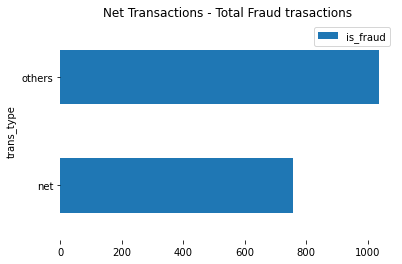

,is_fraud
trans_type,
net,757
others,1038


In [57]:
net_4 = pd.DataFrame(eda_all_df.groupby('trans_type')['is_fraud'].sum())
net_9 = net_4[['is_fraud']]

net_9.plot.barh()
axes = plt.gca() 
axes.spines['top'].set_visible(False)
plt.setp(axes.spines.values(), visible=False)
plt.title('Net Transactions - Total Fraud trasactions')
plt.show()

display(net_9)

In [58]:
net_8 = cc_fraud_eda[cc_fraud_eda['Class']=='fraud']
net_8 = pd.DataFrame(net_8.groupby('trans_type')['amt'].sum())

net_8.plot.barh()
axes = plt.gca() 
axes.spines['top'].set_visible(False)
plt.setp(axes.spines.values(), visible=False)
display(net_4_per)
plt.title('Total Amount of Fraud Transactions - Net vs Others')
display(net_8)
plt.show()

KeyError: 'Class'

In [59]:
net_5a = pd.DataFrame(cc_fraud_eda['merchant'].value_counts())
net_5a

,merchant
SM Retail Inc,4024
Robinsons Retail Holdings Inc,3996
Metro Retail Stores Group,2792
Waltermart Supermarket Inc,1566
Landers,1556
Insular Oil Corp.,1447
SeaOil Philippines Inc.,1432
Rustan Group,1432
Rustans Supermarket,1423
Ace Hardware,1419


In [60]:
mer_type = cc_fraud_eda[['merchant','trans_type']].drop_duplicates()
mer_type = mer_type.set_index('merchant')
mer_type

,trans_type
merchant,
MedStoreRx,net
Ever Supermarket,others
Nine Media Corporation,others
Zalora,net
Ubuy Co.,net
Decathlon,net
eBay,net
Marks and Spencer,others
Rustan Group,others


In [61]:
print('Number of Transactions per Net VS Others - OVERALL')

net_5b = net_5a.join(mer_type).reset_index()
net_5b.rename(columns = {'index':'merchant','merchant':'count'}, inplace=True)
net_5b = net_5b.sort_values(by='count', ascending=False)
net_5b


Number of Transactions per Net VS Others - OVERALL


,merchant,count,trans_type
145,SM Retail Inc,4024,others
136,Robinsons Retail Holdings Inc,3996,others
99,Metro Retail Stores Group,2792,others
194,Waltermart Supermarket Inc,1566,net
193,Waltermart Supermarket Inc,1566,others
83,Landers,1556,net
82,Landers,1556,others
68,Insular Oil Corp.,1447,others
150,SeaOil Philippines Inc.,1432,others
138,Rustan Group,1432,others


In [62]:
only_fraud = cc_fraud_eda[cc_fraud_eda['class']=='fraud']
net_6 = pd.DataFrame(only_fraud['merchant'].value_counts())
net_6 = net_6.join(mer_type).reset_index()
net_6.rename(columns = {'index':'merchant','merchant':'count'}, inplace=True)
net_6 = net_6.sort_values(by='count', ascending=False)

net_6

,merchant,count,trans_type
110,Robinsons Retail Holdings Inc,42,others
87,O Shopping,40,net
118,SM Retail Inc,39,others
165,Zalora,38,net
17,Carousell,38,net
114,Rustans Supermarket,38,others
80,Metro Retail Stores Group,38,others
65,Landers,37,others
66,Landers,37,net
4,All Day Supermarket,36,others


In [63]:
print('Amount of Transactions per Net VS Others - OVERALL')
net_10 = cc_fraud_eda[cc_fraud_eda['class']=='fraud']
net_10 = pd.DataFrame(net_10.groupby(['merchant'])['amt'].sum()).sort_values(by='amt', ascending=False)
net_10 = net_10.join(mer_type).reset_index()
net_10 = net_10.sort_values(by='amt', ascending=False)
net_10

Amount of Transactions per Net VS Others - OVERALL


,merchant,amt,trans_type
87,O Shopping,39828.89,net
165,Zalora,38518.03,net
17,Carousell,38374.43,net
152,Ubuy Co.,34805.16,net
8,BeautyMNL,34133.89,net
69,Lazada,30245.05,net
109,Robinsons,30243.78,net
126,Shopee,30098.09,net
28,DealGrocer,30070.50,net
113,Rustan's,28082.79,net


### Gender

Male    200000
Name: Gender_, dtype: int64

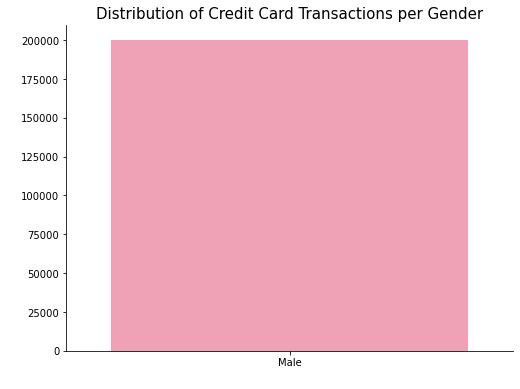

In [64]:
gender_map = {'M': 'Male', 'F': 'Female'}
cc_fraud_eda['Gender_'] = cc_fraud_eda['gender'].map(gender_map)

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x=cc_fraud_eda['Gender_'],
              order=cc_fraud_eda['Gender_'].value_counts().index,
              color="#FC94AF")
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Distribution of Credit Card Transactions per Gender', size=15, y=1)
display(cc_fraud_eda['Gender_'].value_counts())
plt.show()

### Location

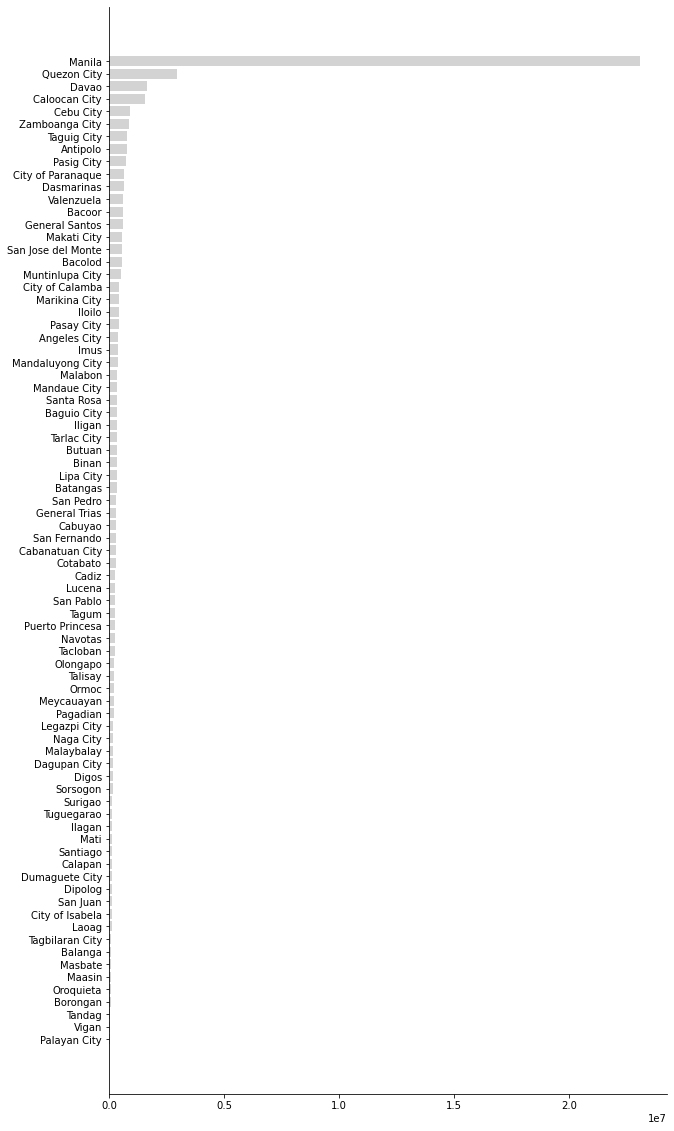

In [65]:
cc_city = cc_fraud_eda.drop_duplicates(subset=['city']).reset_index(drop=True).sort_values(['city_pop'])

colors_l = ['lightgray'] * 85
colors_l[-2:] = ['#ff0257'] * 2

fig, ax = plt.subplots(figsize=(10, 20))
ax.barh(cc_city.city, cc_city.city_pop, color=colors_l)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.show()

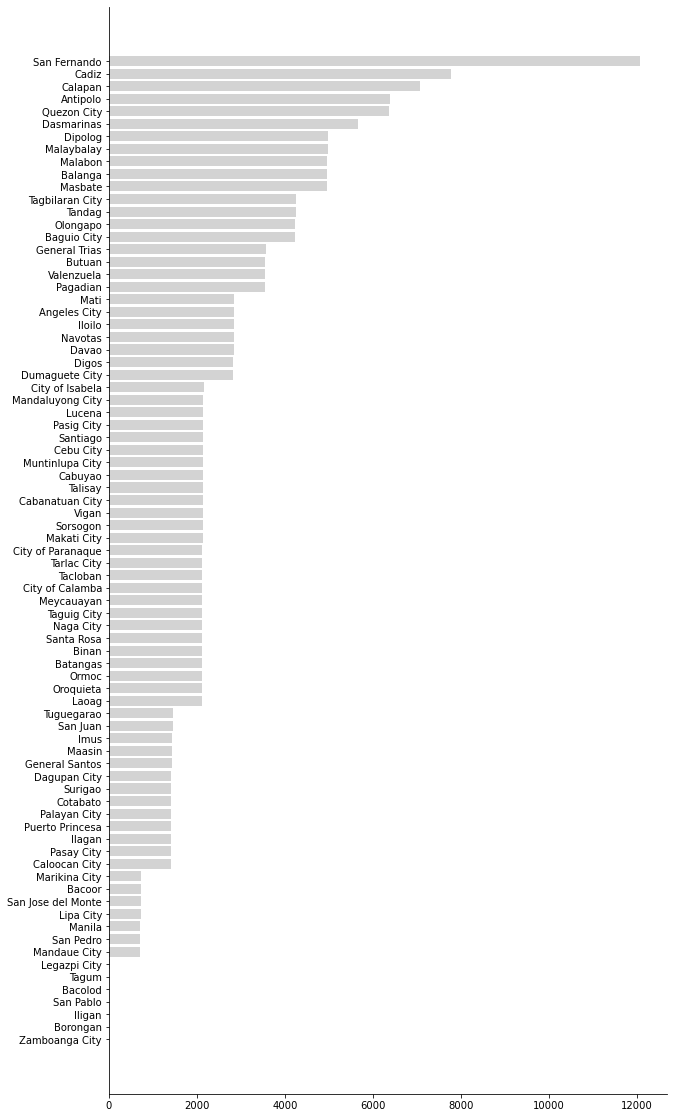

In [66]:
cc_city_2 = pd.DataFrame({'trans_count': cc_fraud_eda['city'].value_counts().sort_values()})

colors_h = ['lightgray'] * 85
colors_h[-3:] = ['#ff0257'] * 3

fig, ax = plt.subplots(figsize=(10, 20))
ax.barh(cc_city_2.index, cc_city_2.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.show()

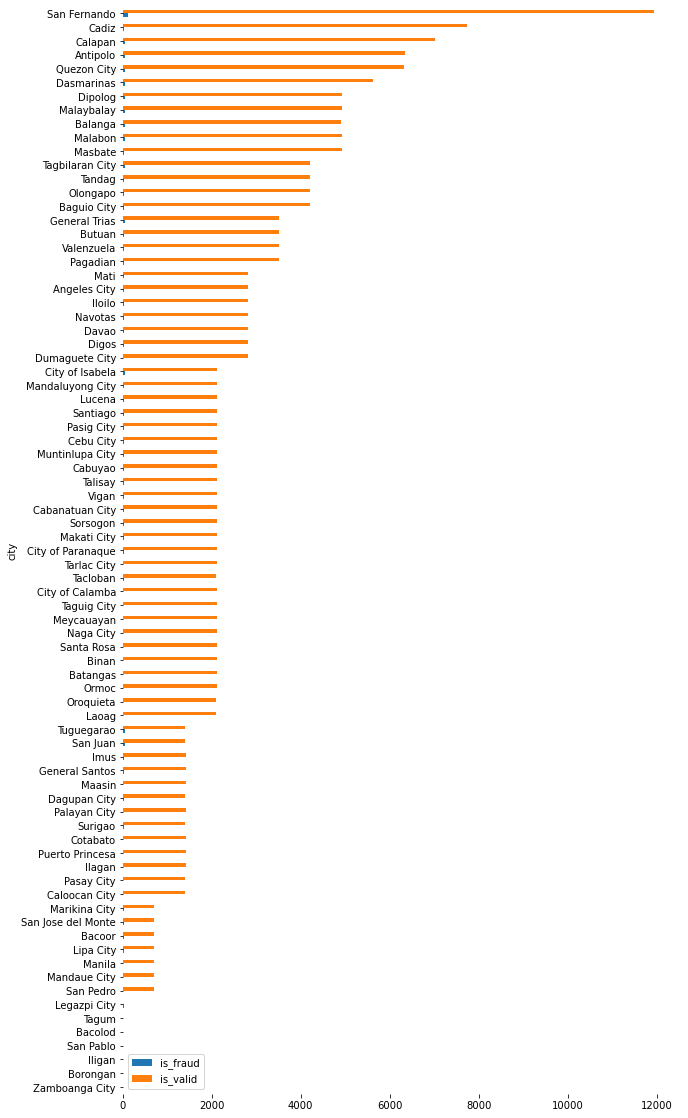

In [67]:
cc_city_3 = pd.DataFrame(cc_fraud_eda.groupby('city')['is_fraud'].sum())
cc_city_3 = cc_city_3.join(cc_city_2).sort_values(['trans_count'])
cc_city_3['is_valid'] = cc_city_3['trans_count'] - cc_city_3['is_fraud']
cc_city_3 = cc_city_3[['is_fraud', 'is_valid']]

cc_city_3.plot.barh(figsize=(10,20))
axes = plt.gca() 
axes.spines['top'].set_visible(False)
plt.setp(axes.spines.values(), visible=False)
plt.show()

### Jobs

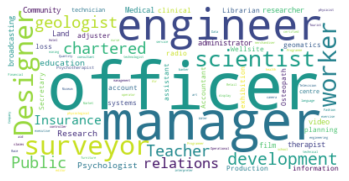

In [68]:
cc_jobs = cc_fraud.drop_duplicates(subset=['ssn']).reset_index(drop=True)

words = []
for phrase in cc_jobs['job'].values:
    for word in phrase.split():
        words.append(word)
jobs_list = ' '.join(words)

stop_words = stopwords.words('english')
stop_words = set(stop_words)

wordcloud = WordCloud(background_color='white',
                      collocations=False, contour_width=2,
                     ).generate(jobs_list)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

### Merchant Category

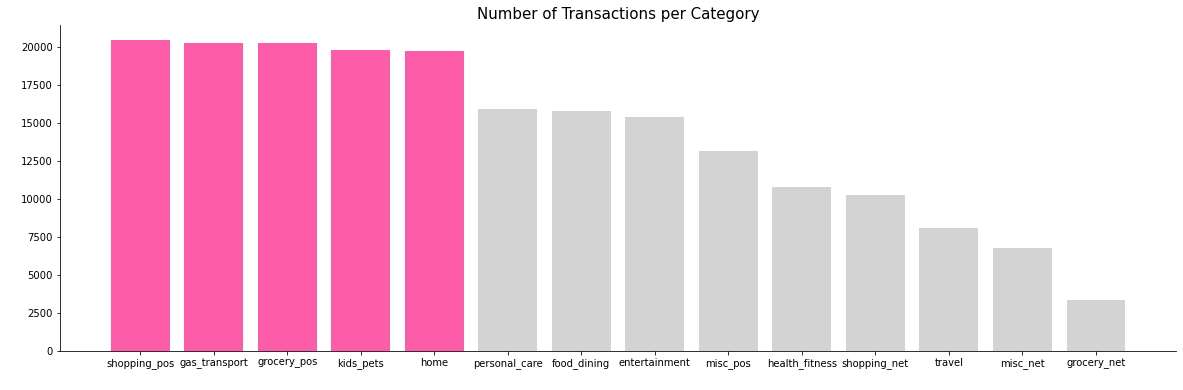

In [69]:
fig, ax = plt.subplots(figsize=(20, 6))

colors_mc = ['lightgray'] * 85
colors_mc[:5] = ['#FD5DA8'] * 5

cc_mc = pd.DataFrame(cc_fraud_eda['category'].value_counts())

ax.bar(cc_mc.index, cc_mc.category, color=colors_mc)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Number of Transactions per Category', size=15, y=1)
plt.show()

### Date

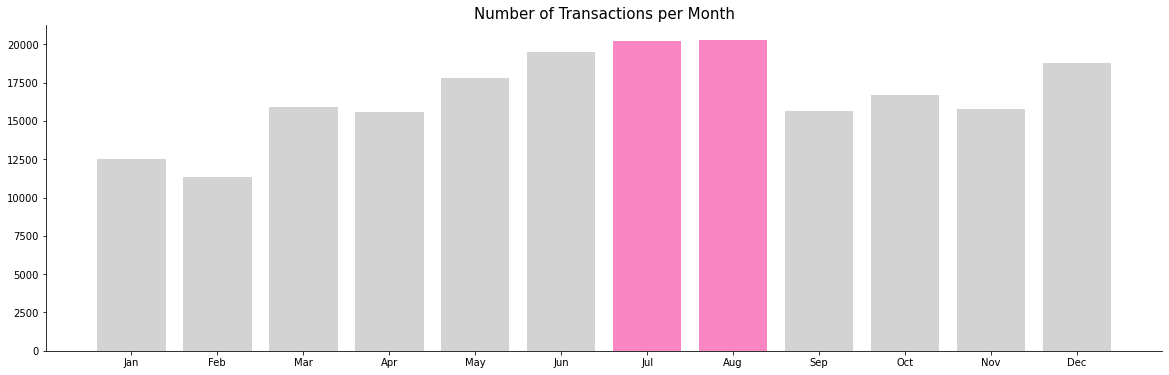

In [70]:
date = pd.DataFrame(cc_fraud_eda['trans_month_'].value_counts()).reset_index().sort_values(['index'])
map_month = cc_fraud_eda.drop_duplicates(['trans_month'])[['trans_month', 'trans_month_']]
map_month.columns = ['trans_month', 'index']
cc_date = map_month.merge(date, on='index').sort_values(['trans_month'])

colors_d = ['lightgray'] * 12
colors_d[6:8] = ['#FA86C4'] * 2

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(cc_date['index'], cc_date.trans_month_, color=colors_d)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Number of Transactions per Month', size=15, y=1)
plt.show()

### Transaction Amount

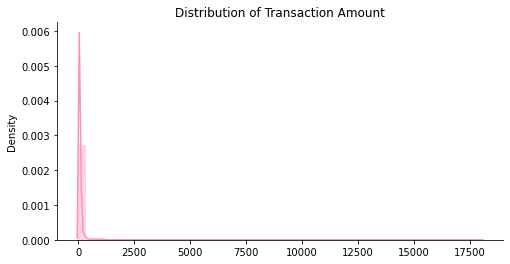

In [71]:
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(cc_fraud_eda['amt'].values, ax=ax, color="#FC94AF")
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title('Distribution of Transaction Amount')
plt.show()

In [72]:
cc_fraud_eda['amt'].describe()

count    200000.000000
mean         70.205819
std         171.601519
min           1.000000
25%           8.700000
50%          48.820000
75%          85.410000
max       18039.810000
Name: amt, dtype: float64

### Correlation

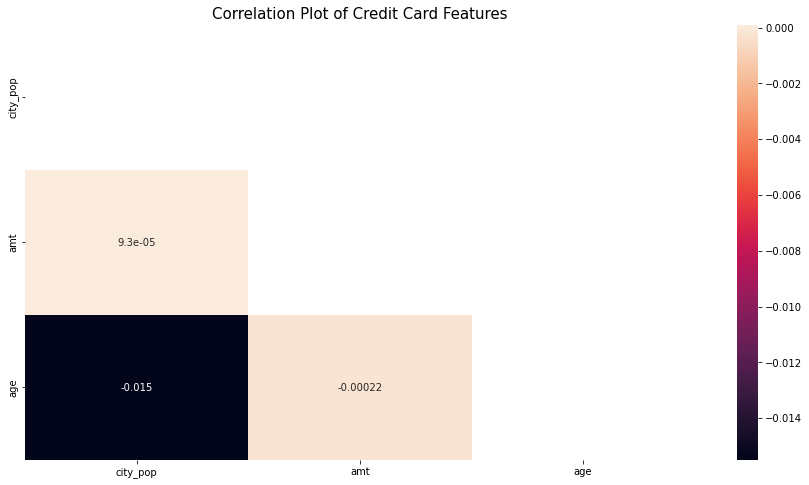

In [73]:
# quant = cc_fraud_eda[['lat', 'long', 'city_pop', 'amt', 'merch_lat', 'merch_long', 'age']]
quant = cc_fraud_eda[[ 'city_pop', 'amt',  'age']]
corr = quant.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)
ax.set_title("Correlation Plot of Credit Card Features", fontsize=15, y=1)
plt.show()

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Baselining </span></div>

In [74]:
df_target = cc_final['is_fraud']
state_counts = Counter(df_target)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')

num=(df_state[0]/df_state[0].sum())**2
print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

Proportion Chance Criterion: 98.22%
1.25 * Proportion Chance Criterion: 122.78%


In [75]:
cc_fraud_eda.columns

Index(['ssn', 'gender', 'city', 'lat', 'long', 'city_pop', 'job', 'category',
       'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'trans_year',
       'trans_month', 'trans_day', 'trans_wday', 'trans_hour', 'trans_month_',
       'part_of_day', 'trans_type', 'age', 'birth_year', 'age_group',
       'dd_sale', 'class', 'Gender_'],
      dtype='object')

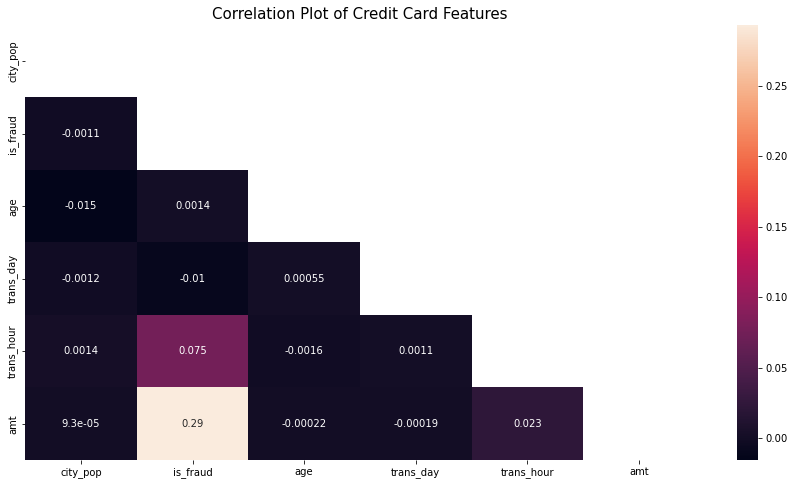

In [77]:
quant = cc_fraud_eda[['city_pop', 'is_fraud', 'age', 'trans_year', 'trans_day', 'trans_hour', 'amt']]

corr = quant.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)
ax.set_title("Correlation Plot of Credit Card Features", fontsize=15, y=1)
plt.show()